# Basics of CuPy

**Negin Sobhani**, **Deepak Cherian**, and **Max Jones**

negins@ucar.edu, dcherian@ucar.edu, max@carbonplan.org

------------

## Overview
### In this tutorial, you learn:

* Basics of Cupy and GPU computing
* Data Transfer Between Host and Device
* Compare speeds to NumPy

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Familiarity with NumPy](https://foundations.projectpythia.org/core/numpy.html) | Necessary | |

- **Time to learn**: 30 minutes

## Introduction to CuPy
CuPy is an open-source GPU-accelerated array library for Python that is compatible with NumPy/SciPy. 

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*Qg5AIeVmg2nnP2XV.png" width="500"><img src="https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg" width="500">

CuPy uses NVIDIA CUDA to run operations on the GPU, which can provide significant performance improvements for numerical computations compared to running on the CPU, especially at larger data sizes. CuPy provides a NumPy-like interface for array manipulation and supports a wide range of mathematical operations, making it a powerful tool for scientific computing on GPUs.

<div class="alert alert-block alert-success">
<b> In simple terms, CuPy can be described as the GPU equivalent of NumPy.</b>
</div>

CuPy is a library that has similar capabilities as NumPy, but with important distinctions that make it ideal for GPU computing. CuPy provides:

* An object similar to NumPy's multidimensional array, except that it resides in the memory of the GPU, allowing for faster computations involving large data sets.

* A system for applying "universal functions" (`ufuncs`) that adhere to broadcasting rules. This system leverages the parallel computing power of GPUs for better performance.

* CuPy provides an extensive collection of CUDA-ready array functions. CUDA is NVIDIA's parallel computing platform and API model, which allows software developers to use a CUDA-enabled GPU for general purpose processing. CuPy's extensive set of pre-implemented mathematical functions can be used on arrays right off the bat, taking full advantage of GPU acceleration.

For more information about CuPy, please visit:

[CuPy Homepage](https://docs.cupy.dev/en/stable/index.html#)

[CuPy Github](https://github.com/cupy/cupy)

In this tutorial, we will explore the distinctive features of CuPy and show their differences from NumPy. Let's get started!

## Getting Started with CuPy

Once CuPy is installed, we can import it in the same way as NumPy:


In [1]:
## Import NumPy and CuPy
import cupy as cp
import numpy as np

### Arrays in CuPy vs. NumPy

CuPy arrays can be declared using the `cupy.ndarray` class, much like NumPy arrays using `numpy.ndarrays`. However, it is important to note that while NumPy arrays are generated on the CPU (referred to as the "host"), CuPy arrays are generated on the GPU (known as the "device").

CuPy arrays look just like NumPy arrays:

In [2]:
# create a 1D array with 5 elements on CPU
arr_cpu = np.array([1, 2, 3, 4, 5])
print("On the CPU: ", arr_cpu)
print (type(arr_cpu))

On the CPU:  [1 2 3 4 5]
<class 'numpy.ndarray'>


In [3]:
# create a 1D array with 5 elements on GPU
arr_gpu = cp.array([1, 2, 3, 4, 5])
print("On the GPU: ", arr_gpu)
print (type(arr_gpu))

On the GPU:  [1 2 3 4 5]
<class 'cupy.ndarray'>


 You can also create multi-dimensional arrays:

In [4]:
# create a 2D array of zeros with 3 rows and 4 columns
arr_cpu = np.zeros((3, 4))
print("On the CPU: ", arr_cpu)
print (type(arr_cpu))

On the CPU:  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<class 'numpy.ndarray'>


In [5]:
arr_gpu = cp.zeros((3, 4))
print("On the GPU: ", arr_gpu)
print (type(arr_gpu))

On the GPU:  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<class 'cupy.ndarray'>


As we can see in the above examples, CuPy arrays look just like NumPy arrays, except that Cupy arrays are stored on GPUs vs. Numpy arrays are stored on CPUs.

### Basic Operations 
CuPy provides equivalents for many common NumPy functions, although not all. Most of CuPy's functions have the same function call as their NumPy counterparts. See the reference for the supported subset of NumPy API.
| | |
| :--- | :--- |
| **NumPy** | **CuPy** |
| numpy.identity        | cupy.identity       |
| numpy.matmul        | cupy.matmul       |
| numpy.nan_to_num        | cupy.nan_to_num       |
| numpy.zeros        | cupy.zeros       |
| numpy.ones        | cupy.ones       |
| numpy.shape        | cupy.shape       |
| numpy.reshape        | cupy.reshape       |
| numpy.tensordot        | cupy.tensordot       |
| numpy.transpose        | cupy.transpose       |
| numpy.fft.fft        | cupy.fft.fft       |

Cupy also provides equivalant functions for some SciPy functions, but its implementation is not as extensive as NumPy's.

A full list of CuPy's Numpy and Scipy equivalent functions are provided on the link below:

[Complete Comparison of NumPy and SciPy to CuPy functions](https://docs.cupy.dev/en/stable/reference/comparison.html)

[CuPy API Reference](https://docs.cupy.dev/en/stable/reference/index.html)

In [6]:
# NumPy: Create an array
numpy_a = np.array([1, 2, 3, 4, 5])

# CuPy: Create an array
cupy_a = cp.array([1, 2, 3, 4, 5])

Basic arithmetic operations is exactly identical between numpy and cupy. 

In [7]:
# Basic arithmetic operations
numpy_b = numpy_a + 2
cupy_b = cupy_a + 2

numpy_c = numpy_a * 2
cupy_c = cupy_a * 2

numpy_d = numpy_a.dot(numpy_a)
cupy_d = cupy_a.dot(cupy_a)

# Reshaping arrays
numpy_e = numpy_a.reshape(5, 1)
cupy_e = cupy_a.reshape(5, 1)

# Transposing arrays
numpy_f = numpy_e.T
cupy_f = cupy_e.T

# Complex example: element-wise exponential and sum
numpy_g = np.exp(numpy_a) / np.sum(np.exp(numpy_a))
cupy_g = cp.exp(cupy_a) / cp.sum(cp.exp(cupy_a))

### Data Transfer

#### Data Transfer to a Device
`cupy.asarray()` can be used to move a numpy array to a device (GPU).

In [8]:
# Move data to GPU
arr_gpu = cp.asarray(arr_cpu)

#### Move array from GPU to the CPU

Moving a device array to the host (i.e. CPU) can be done by `cupy.asnumpy()` as follows:

In [9]:
# Move data back to host
arr_cpu = cp.asnumpy(arr_gpu)

We can also use `cupy.ndarray.get()`:

In [10]:
arr_cpu = arr_gpu.get()

### Device Information 
CuPy introduces the concept of a *current* device, which represents the default GPU device for array allocation, manipulation, calculations, and other operations. 

`cupy.ndarray.device` attribute can be used to determine the device allocated to a CUPY array: 

In [11]:
cupy_g.device

<CUDA Device 0>

To obtain the total number of accessible devices, you can utilize the getDeviceCount function.

In [12]:
cp.cuda.runtime.getDeviceCount()

2

The default behavior runs code on Device 0, but we can transfer arrays other devices with CuPy using `cp.cuda.Device()`. This capability becomes significantly important when your code is designed to harness the power of multiple GPUs.

If you want to change to a different GPU device, you can do so by utilizing the "device" context manager. For example the following create an array on the GPU 2. 

``` python 
with cp.cuda.Device(2):
    x_on_gpu2 = cp.array([1, 2, 3, 4, 5])
```

There is no need for explicit device switching when only one device is available.

## CuPy vs NumPy: Speed Comparison

Now that we are familar with CuPy, let's explore the performance improvements that CuPy can provide in comparison to NumPy for different data sizes. 

First, we are looking at matrix multiplication for array size of 3000x3000.

In [13]:
import time

# create two 3000x3000 matrices
n = 3000

a_np = np.random.rand(n, n)
b_np = np.random.rand(n, n)

a_cp = cp.asarray(a_np)
b_cp = cp.asarray(b_np)

# perform matrix multiplication with NumPy and time it
start_time = time.time()
c_np = np.matmul(a_np, b_np)
end_time = time.time()

numpy_time = end_time - start_time
print("NumPy time:", numpy_time, "seconds")

# perform matrix multiplication with CuPy and time it
start_time = time.time()
c_cp = cp.matmul(a_cp, b_cp)
cp.cuda.Stream.null.synchronize()  # wait for GPU computation to finish
end_time = time.time()

cupy_time = end_time - start_time

print("CuPy time:", cupy_time, "seconds")
print("CuPy provides a", round(numpy_time / cupy_time, 2), "x speedup over NumPy.")

NumPy time: 0.7095739841461182 seconds
CuPy time: 0.6216685771942139 seconds
CuPy provides a 1.14 x speedup over NumPy.


Now, let's run the same CuPy operation again:

In [14]:
# perform matrix multiplication with CuPy and time it
start_time = time.time()
c_cp = cp.matmul(a_cp, b_cp)
cp.cuda.Stream.null.synchronize()  # wait for GPU computation to finish
end_time = time.time()

cupy_time = end_time - start_time

print("CuPy time:", cupy_time, "seconds")
print("CuPy provides a", round(numpy_time / cupy_time, 2), "x speedup over NumPy.")

CuPy time: 0.01408529281616211 seconds
CuPy provides a 50.38 x speedup over NumPy.


### What happened? Why CuPy is faster the second time?
When running these functions for the first time, you may experience a brief pause. This occurs as CuPy compiles the CUDA functions for the first time and cached them on disk for future use.


Now, let's make the same comparison with different array sizes.

We can use the following function to find the size of a variable on memory. 

In [15]:
# Define function to display variable size in MB
import sys
def var_size(in_var):
    result = sys.getsizeof(in_var) / 1e6
    print(f"Size of variable: {result:.2f} MB")

In [33]:
speed_ups = []
arr_sizes = []
sizes = [100,200,500,1000, 2000, 5000, 10000]
for n in sizes:
    print("n =", n)

    # create two nxn matrices
    a_np = np.random.rand(n, n)
    b_np = np.random.rand(n, n)
    
    a_cp = cp.asarray(a_np)
    b_cp = cp.asarray(b_np)
    
    arr_size = a_cp.nbytes/ 1e6
    print(f"Size of variable: {arr_size:.2f} MB")
    
    # perform matrix multiplication with NumPy and time it
    start_time = time.time()
    c_np = np.matmul(a_np, b_np)
    end_time = time.time()
    numpy_time = end_time - start_time

    # perform matrix multiplication with CuPy and time it
    start_time = time.time()
    c_cp = cp.matmul(a_cp, b_cp)
    cp.cuda.Stream.null.synchronize()  # wait for GPU computation to finish
    end_time = time.time()
    cupy_time = end_time - start_time

    speed_up = round(numpy_time / cupy_time,2)
    
    speed_ups.append(speed_up)
    arr_sizes.append(arr_size)
    # print the speedup
    print("CuPy provides a", speed_up, "x speedup over NumPy.\n")

n = 100
Size of variable: 0.08 MB
CuPy provides a 6.45 x speedup over NumPy.

n = 200
Size of variable: 0.32 MB
CuPy provides a 1.28 x speedup over NumPy.

n = 500
Size of variable: 2.00 MB
CuPy provides a 9.83 x speedup over NumPy.

n = 1000
Size of variable: 8.00 MB
CuPy provides a 41.17 x speedup over NumPy.

n = 2000
Size of variable: 32.00 MB
CuPy provides a 72.55 x speedup over NumPy.

n = 5000
Size of variable: 200.00 MB
CuPy provides a 77.9 x speedup over NumPy.

n = 10000
Size of variable: 800.00 MB
CuPy provides a 80.68 x speedup over NumPy.



We can also create a plot of data size vs. speed-ups:

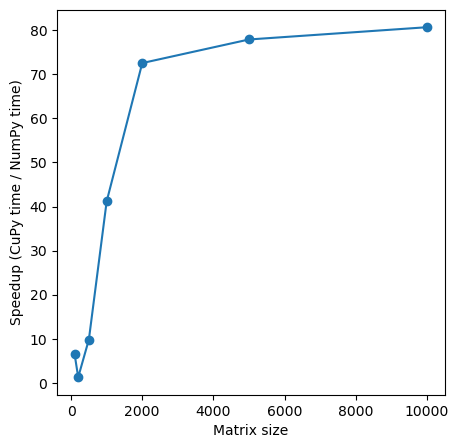

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(sizes, speed_ups, marker='o')
plt.xlabel('Matrix size')
plt.ylabel('Speedup (CuPy time / NumPy time)')
#plt.xticks(sizes) 
plt.show()

<div class="alert alert-warning"><b>NOTE: </b>
As we can see above, GPUs computations can be slower than CPUs. There are several reasons for this: 
    
* The size of our arrays: The GPU's performance relies on parallelism, processing thousands of values simultaneously. To fully leverage the GPU's capabilities, we require a significantly larger array. As we see in the above example, for bigger matrix size we see more speed-ups. 

* The simplicity of our calculation: Transferring a calculation to the GPU involves considerable overhead compared to executing a function on the CPU. If our calculation lacks a sufficient number of mathematical operations (known as "arithmetic intensity"), the GPU will spend most of its time waiting for data movement.

* Data copying to and from the GPU impacts performance: While including copy time can be realistic for a single function, there are instances where we need to execute multiple GPU operations sequentially. In such cases, it is advantageous to transfer data to the GPU and keep it there until all processing is complete.

Congratulations! You have now uncovered the capabilities of CuPy. It's time to unleash its power and accelerate your own code by replacing NumPy with CuPy wherever applicable and appropriate. In the next chapters we will delve into Cupy Xarray capabilities. 

## Summary

In this notebook, we have learned about:

* Cupy Basics
* Data Transfer between Device and Host
* Performance of Cupy vs. Numpy on different array sizes. 

## Additional Resources

[CuPy Homepage](https://cupy.dev/)  
[CuPy Github](https://github.com/cupy/cupy)  
[CuPy User Guide](https://docs.cupy.dev/en/stable/user_guide/index.html)